In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

# Exploratory Data Analysis

### Loading and Inspection

In [195]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [197]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [198]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [199]:
df.shape

(6433, 14)

## Missing Values Handling

In [200]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [201]:
# Percentage of Missing Values
print('Percentage of Missing Values')
df.isna().sum() / df.shape[0] * 100

Percentage of Missing Values


pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64

In [202]:
# check shape if missing records are deleted
print(f'Number of Missing Values:\n{df.shape[0] - df.dropna().shape[0]}')

# percentage of data loss if deleted
print(f'Percentage of Data Loss:\n{(df.shape[0] - df.dropna().shape[0]) / df.shape[0] * 100}')

Number of Missing Values:
92
Percentage of Data Loss:
1.4301259132597544


**Note**: Less than 10% of data loss is acceptable.

In [203]:
# Deleting missing values
df = df.dropna()

In [204]:
df.shape

(6341, 14)

In [205]:
df.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [206]:
# Reset the index after deletion
df.reset_index()

,index,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


## Target Variable and Relation analysis
(Bivariate Analysis) (Feature to Target Analysis)

target - tip column

## Categorical Columns with Target feature

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

Categorical columns: `color`, `payment`, `pickup_borough`, `dropoff_borough`, `pickup_zone`, `dropoff_zone`

### Relation between color col and target col.

In [208]:
df['color'].unique()

array(['yellow', 'green'], dtype=object)

In [209]:
df.color.value_counts()

color
yellow    5373
green      968
Name: count, dtype: int64

#### Graphical analysis

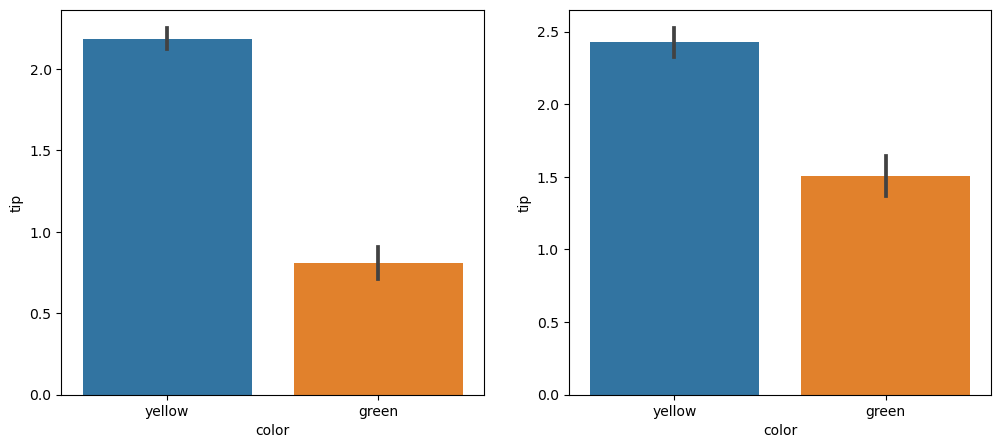

In [210]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='color', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='color', y='tip', estimator='std')
plt.show()

**Insight**: 
- `yellow` color category seems to pay higher when compared with `green` color category.
- `color` column shows an impact on the target tip.

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


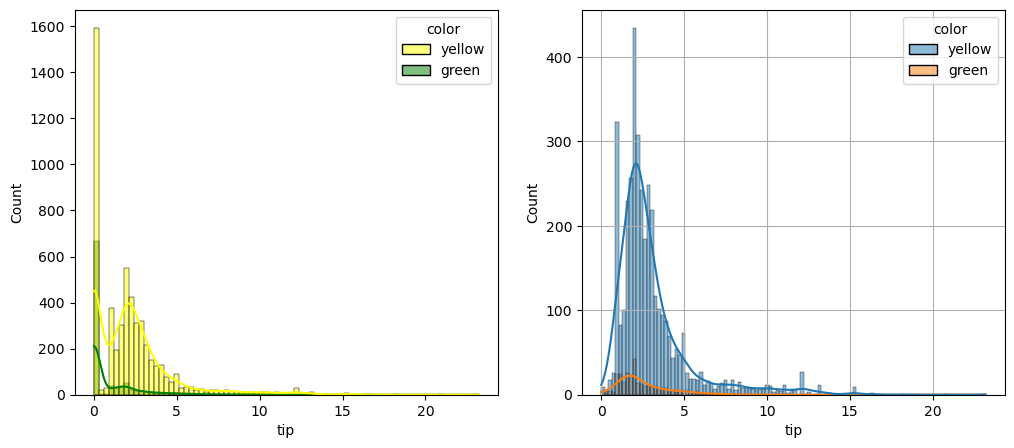

In [211]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tip', hue='color', kde=True, palette=['yellow', 'green'])
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['tip'] > 0], x='tip', hue='color', kde=True)
plt.grid(True)
plt.show()

**Insights**:
- It can be observed that the `yellow` category has a higher frequency of tips.
- The `green` category has a very low frequency of tips compared to the yellow category.

**Interpretation**:
- Both distributions are almost similar and are normally distributed.
- In this situation, understanding whether this feature affects the tips or not is difficult. So, hypothesis testing is useful.
- Hypothesis testing can be used to find out whether these are independent or dependent. (color and tip cols)

#### Independent T-Test
**Hypotheses**:
- H0: distribution of tip for yellow = distribution of tip for green.
- H1: distribution of tip for yellow != distribution of tip for green.of Female

In [212]:
# independent t-test
yellow_tip = df[df['color']=='yellow']['tip']
green_tip = df[df['color']=='green']['tip']

In [213]:
yellow_tip.shape

(5373,)

In [214]:
green_tip.shape

(968,)

In [215]:
t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print(f'Indpendent T-Test Statictis: {t_stat}')
print(f'P-value: {p_val}')

Indpendent T-Test Statictis: 17.05932566128597
P-value: 7.791088119489451e-64


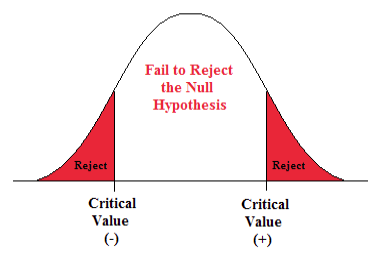

In [216]:
alpha = 0.05
if p_val < alpha:
    print('Reject Null Hypothesis: yellow tips differ by green tips.')
else:
    print('Fail to reject the Null Hypothesis: No significance difference between yellow tips and green tips.')

Reject Null Hypothesis: yellow tips differ by green tips.


**Insight**:
- There is an effect of color feature on the tip.

**Decision**:
- `color` is a meaningful feature to predict `tip`, because the `yellow` and `green` differ.

### Relation between payment col and target col.

`payment` is a categorical column.

In [217]:
df.payment.unique()

array(['credit card', 'cash'], dtype=object)

In [218]:
df.payment.value_counts()

payment
credit card    4546
cash           1795
Name: count, dtype: int64

#### Graphical Analysis

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


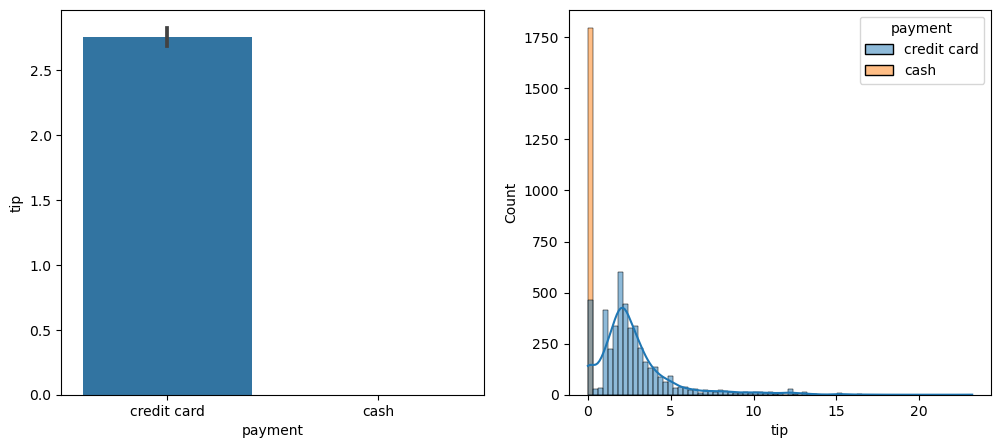

In [219]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='payment', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='tip', hue='payment', kde=True)
plt.show()

**Insights**:
- There are no tips given with the payment type - cash.

#### Independent T-Test
**Hypotheses**:
- H0: distribution of tips for credit card = distribution of tips for cash
- H1: distribution of tips for credit card != distribution of tips for cash

In [220]:
# independent t-test
credit_card_tip = df[df['payment']=='credit card']['tip']
cash_tip = df[df['payment']=='cash']['tip']

In [221]:
credit_card_tip.shape

(4546,)

In [222]:
cash_tip.shape

(1795,)

In [223]:
t_stat, p_val = stats.ttest_ind(credit_card_tip, cash_tip)
print(f'Indpendent T-Test Statictis: {t_stat}')
print(f'P-value: {p_val}')

Indpendent T-Test Statictis: 49.09538452722153
P-value: 0.0


In [224]:
alpha = 0.05
if p_val < alpha:
    print('Reject Null Hypothesis: credit card tips differ by cash tips.')
else:
    print('Fail to reject the Null Hypothesis: No significance difference between credit card tips and cash tips.')

Reject Null Hypothesis: credit card tips differ by cash tips.


**Insights**:
- There is a significant difference between credit card payment and cash payment in tips.

**Decision**:
- `payment` feature affects the target feature `tip`.

### Relation between pickup_borough col and target col.

In [225]:
df.pickup_borough.unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [226]:
df.pickup_borough.value_counts()

pickup_borough
Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: count, dtype: int64

#### Graphical Analysis

<Axes: xlabel='pickup_borough', ylabel='count'>

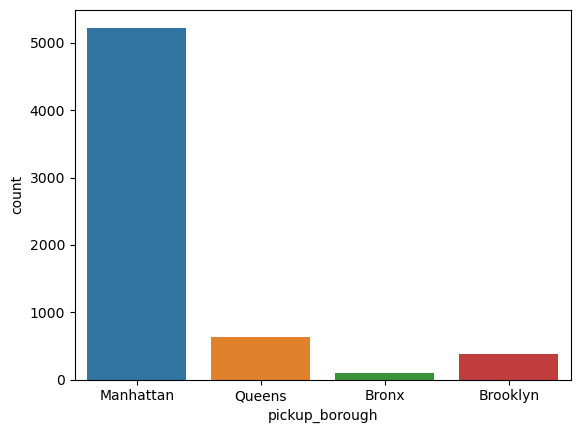

In [227]:
# Univariate Analysis
sns.countplot(data=df, x='pickup_borough')

In [228]:
df.groupby('pickup_borough')['tip'].mean()

pickup_borough
Bronx        0.148586
Brooklyn     0.979127
Manhattan    1.945597
Queens       3.066458
Name: tip, dtype: float64

In [229]:
df.groupby('pickup_borough')['tip'].std()

pickup_borough
Bronx        0.897261
Brooklyn     1.674487
Manhattan    1.997736
Queens       4.323951
Name: tip, dtype: float64

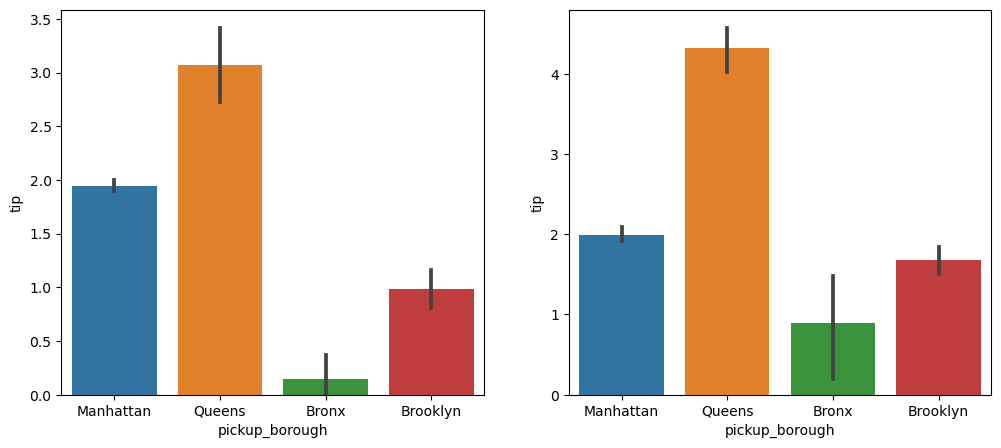

In [230]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='pickup_borough', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='pickup_borough', y='tip', estimator='std')
plt.show()

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tip', ylabel='Count'>

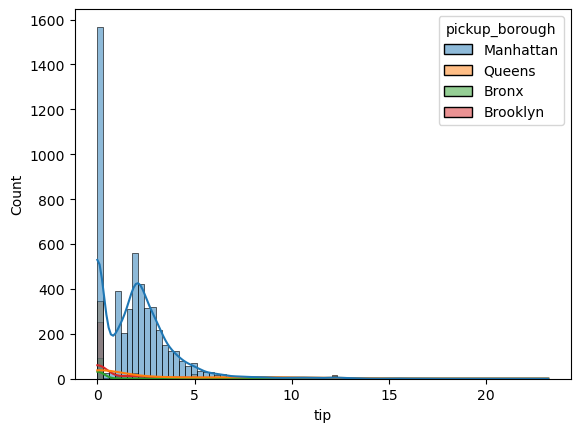

In [231]:
# sns.histplot(data=df, x='tip', hue='pickup_borough', bins=20, kde=True)
sns.histplot(data=df, x='tip', hue='pickup_borough', kde=True)

#### Anova Test

**Hypotheses**:

- H0: Distribution of tip is the same across all pickup_borough categories.
- H1: Distribution of tip for at least one category differs.

In [232]:
df.pickup_borough.unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [233]:
manhattan_tip = df[df['pickup_borough']=='Manhattan']['tip']
queens_tip = df[df['pickup_borough']=='Queens']['tip']
bronx_tip = df[df['pickup_borough']=='Bronx']['tip']
brooklyn_tip = df[df['pickup_borough']=='Brooklyn']['tip']

In [234]:
f_stat, p_val = stats.f_oneway(manhattan_tip, queens_tip, bronx_tip, brooklyn_tip)
print(f'ANOVA statistic: {f_stat}')
print(f'P-Value: {p_val}')

ANOVA statistic: 91.57933831850553
P-Value: 5.155109332424193e-58


In [235]:
alpha = 0.05 # significance level
if p_val < alpha:
    print('Reject Null Hypothesis. At least one group is different.')
else:
    print('Fail to reject the Null Hypothesis. All groups have the same distribution.')

Reject Null Hypothesis. At least one group is different.


#### Tykey HSD Test

**Hypothesis**:
- H0: Distribution of group 1 = distribution of group 2
- H1: Distribution of group 1 != distribution of group 2

In [236]:
# Tukey HSD Test
# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.pickup_borough, alpha=0.05)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


**Interpretation**:
- Reject: True - Means the Null hypothesis is rejected.
- All groups are different from each other.

**Decision**:
- `pickup_borough` column affects the target feature `tip`.

### Relation between pickup_borough col and target col.

In [237]:
df.dropoff_borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [238]:
df.dropoff_borough.value_counts()

dropoff_borough
Manhattan        5172
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: count, dtype: int64

#### Graphical Analysis

<Axes: xlabel='dropoff_borough', ylabel='count'>

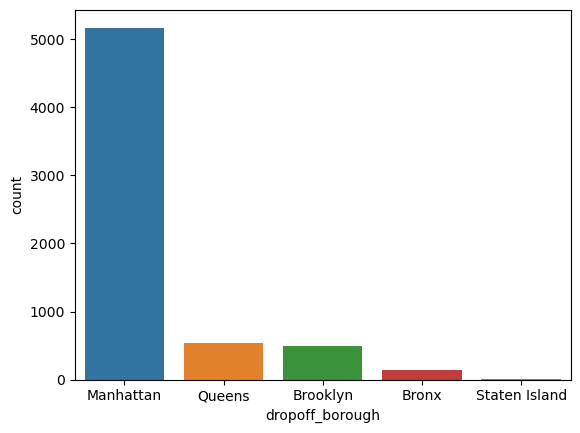

In [239]:
# Univariate Analysis 
sns.countplot(data=df, x='dropoff_borough')

In [240]:
df.groupby('dropoff_borough')['tip'].mean()

dropoff_borough
Bronx             0.534706
Brooklyn          1.921590
Manhattan         1.964321
Queens            2.422022
Staten Island    14.165000
Name: tip, dtype: float64

In [241]:
df.groupby('dropoff_borough')['tip'].std()

dropoff_borough
Bronx            1.788795
Brooklyn         2.896229
Manhattan        2.052074
Queens           3.947016
Staten Island    2.976920
Name: tip, dtype: float64

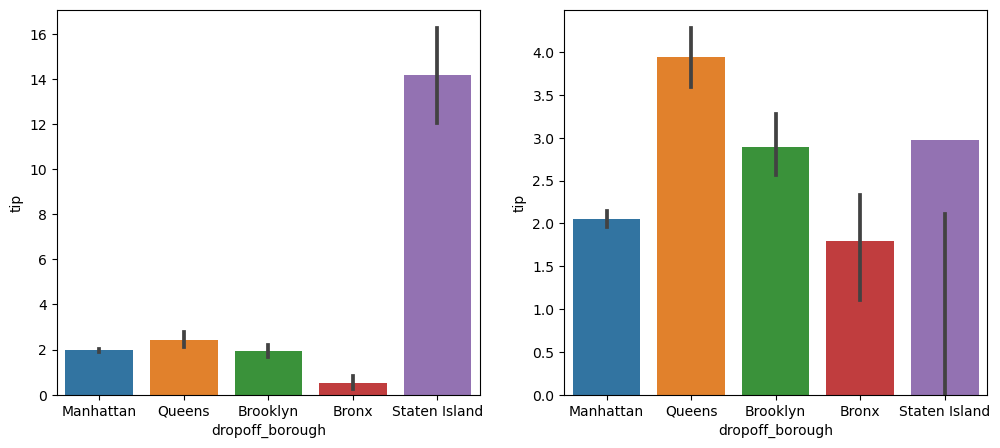

In [242]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='dropoff_borough', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='dropoff_borough', y='tip', estimator='std')
plt.show()

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tip', ylabel='Count'>

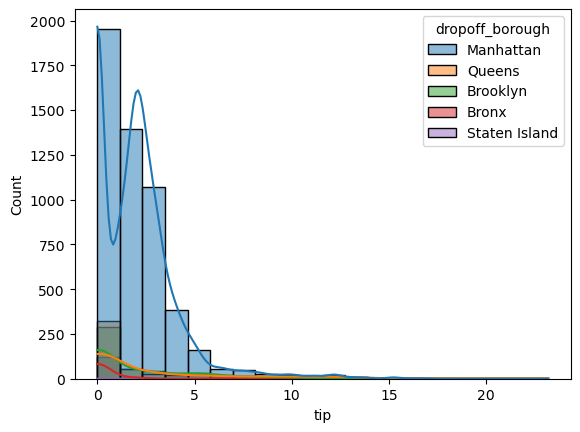

In [243]:
sns.histplot(data=df, x='tip', hue='dropoff_borough', kde=True, bins=20)

#### ANOVA Test

**Hypotheses**:
- H0: Distribution of tips is the same across all regions.
- H1: Distribution of tips is different for at least one region.

In [244]:
df.dropoff_borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [245]:
manhattan_tip = df[df['dropoff_borough']=='Manhattan']['tip']
queens_tip = df[df['dropoff_borough']=='Queens']['tip']
bronx_tip = df[df['dropoff_borough']=='Bronx']['tip']
brooklyn_tip = df[df['dropoff_borough']=='Brooklyn']['tip']
staten_island_tip = df[df['dropoff_borough']=='Staten Island']['tip']

In [246]:
f_stat, p_val = stats.f_oneway(manhattan_tip, queens_tip, bronx_tip, brooklyn_tip, staten_island_tip)
print(f'ANOVA statistic: {f_stat}')
print(f'P-Value: {p_val}')

ANOVA statistic: 31.424177966968262
P-Value: 5.87859571331583e-26


In [247]:
alpha = 0.05 # significance level
if p_val < alpha:
    print('Reject Null Hypothesis. At least one group is different.')
else:
    print('Fail to reject the Null Hypothesis. All groups have the same distribution.')

Reject Null Hypothesis. At least one group is different.


**Insights**:
- At least one region distribution is different.

#### Tukey HSD Test

**Hypotheses**:
- H0: Distribution of region 1 = Distribution of region 2
- H1: Distribution of region 1 != Distribution of region 2

In [248]:
# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.dropoff_borough, alpha=0.05)
print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


**Insights**:
- All region pairs have different distributions except `Manhattan` and `Brooklyn`.

**Decision**:- `dropoff_borough`gh column affects the target featur`e t`ip.

### Relation between pickup_zone and dropoff_zone cols and target col.

In [249]:
df.pickup_zone.unique()

array(['Lenox Hill West', 'Upper West Side South', 'Alphabet City',
       'Hudson Sq', 'Midtown East', 'Times Sq/Theatre District',
       'Battery Park City', 'East Harlem South', 'Lincoln Square East',
       'LaGuardia Airport', 'Murray Hill', 'Lincoln Square West',
       'Financial District North', 'Upper West Side North',
       'East Chelsea', 'Midtown Center', 'Gramercy',
       'Penn Station/Madison Sq West', 'Sutton Place/Turtle Bay North',
       'West Chelsea/Hudson Yards', 'Clinton East', 'Clinton West',
       'UN/Turtle Bay South', 'Midtown South', 'Midtown North',
       'Garment District', 'Lenox Hill East', 'Flatiron',
       'TriBeCa/Civic Center', 'Upper East Side North', 'West Village',
       'Greenwich Village South', 'JFK Airport', 'East Village',
       'Union Sq', 'Yorkville West', 'Central Park',
       'Meatpacking/West Village West', 'Kips Bay', 'Morningside Heights',
       'Astoria', 'East Tremont', 'Upper East Side South',
       'Financial District Sou

In [250]:
df.pickup_zone.value_counts()

pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
                               ... 
Highbridge Park                   1
Brighton Beach                    1
Bronx Park                        1
Crotona Park East                 1
Hillcrest/Pomonok                 1
Name: count, Length: 194, dtype: int64

#### Graphical Analysis

<Axes: xlabel='pickup_zone', ylabel='count'>

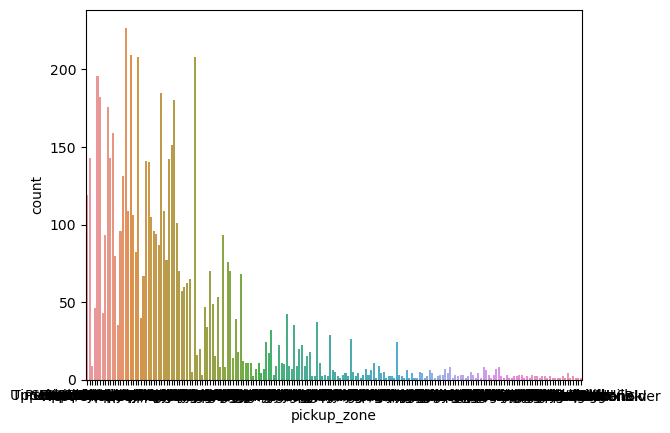

In [251]:
# Univariate
sns.countplot(data=df, x='pickup_zone')

<Axes: xlabel='dropoff_zone', ylabel='count'>

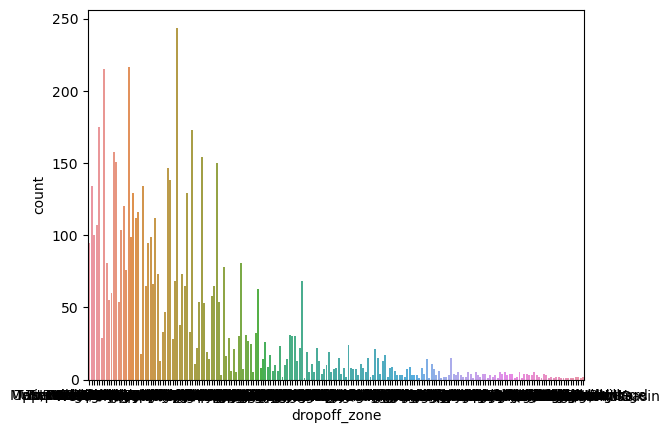

In [252]:
sns.countplot(data=df, x='dropoff_zone')

**Interpretation**:
- Grabbing insights for these features from graphical analysis is tough.

#### ANOVA Test for pickup_zone

In [253]:
categories = [group['tip'].values for name, group in df.groupby('pickup_zone')]

f_stat, p_val = stats.f_oneway(*categories)
print(f'ANOVA statistic: {f_stat}')
print(f'P-Value: {p_val}')

ANOVA statistic: 7.563376210961905
P-Value: 7.892434822142503e-169


In [254]:
alpha = 0.05 # significance level
if p_val < alpha:
    print('Reject Null Hypothesis. At least one group is different.')
else:
    print('Fail to reject the Null Hypothesis. All groups have the same distribution.')

Reject Null Hypothesis. At least one group is different.


**Insights**:
- `pickup_zone` feature affects the target feature `tip`.

#### ANOVA Test for dropoff_zone

In [255]:
categories = [group['tip'].values for name, group in df.groupby('dropoff_zone')]

f_stat, p_val = stats.f_oneway(*categories)
print(f'ANOVA statistic: {f_stat}')
print(f'P-Value: {p_val}')

ANOVA statistic: 5.769034673275405
P-Value: 1.3107168403750418e-120


In [256]:
alpha = 0.05 # significance level
if p_val < alpha:
    print('Reject Null Hypothesis. At least one group is different.')
else:
    print('Fail to reject the Null Hypothesis. All groups have the same distribution.')

Reject Null Hypothesis. At least one group is different.


**Insights**:
- `dropoff_zone` feature affects the target feature `tip`.

**Decision**:
- Both `pickup_zone` and `dropoff_zone` has effect on `tip` feature.

## Numerical Columns with Target feature

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

Numerical Columns: `passengers`, `distance`, `fare`, `tip`, `tolls`, `total`

### Univariate Analysis

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tip', ylabel='Count'>

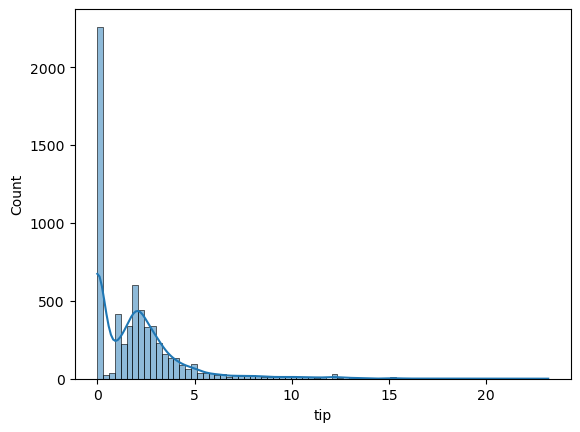

In [258]:
sns.histplot(df['tip'], kde=True)

### Relation between passengers and tip features

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passengers', ylabel='Count'>

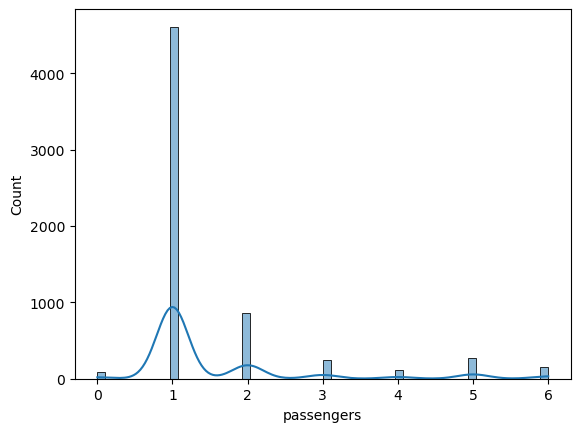

In [259]:
sns.histplot(data=df, x='passengers', kde=True)

<Axes: xlabel='tip', ylabel='passengers'>

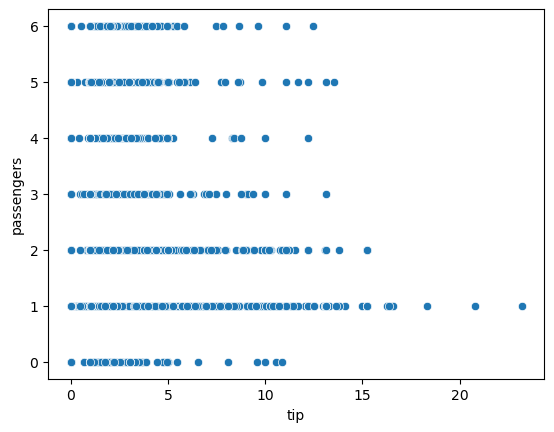

In [260]:
sns.scatterplot(data=df, x='tip', y='passengers')

**Interpretation**:
- Finding insights from this type of graph is tough. So the correlation test is useful here.

#### Spearman Correlation Test

**Hypotheses**:
- H0: Correlation is zero.
- H1: There is a significant correlation

In [261]:
r, p_val = stats.spearmanr(df['tip'], df['passengers'])
print(f'Correlation: {r}')
print(f'P-Value: {p_val}')

Correlation: 0.027509812818779178
P-Value: 0.028480753176042872


In [262]:
alpha = 0.05 # significance
if p_val < alpha:
    print('Reject Null Hypotheses. There is relationship.')
else:
    print('Fail to reject Null Hypotheses. There is no significant relationship.')

Reject Null Hypotheses. There is relationship.


### Relation between fair and tip features

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

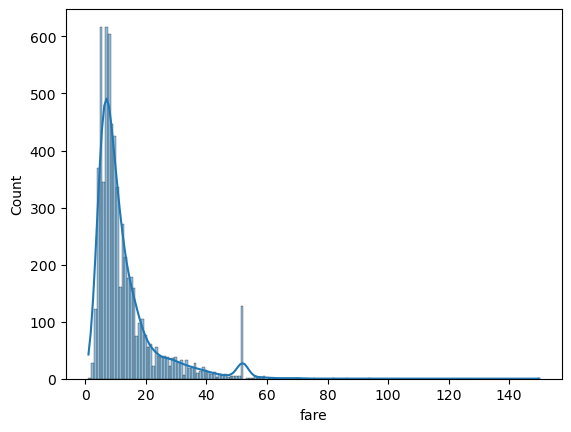

In [263]:
sns.histplot(data=df, x='fare', kde=True)

<Axes: xlabel='tip', ylabel='fare'>

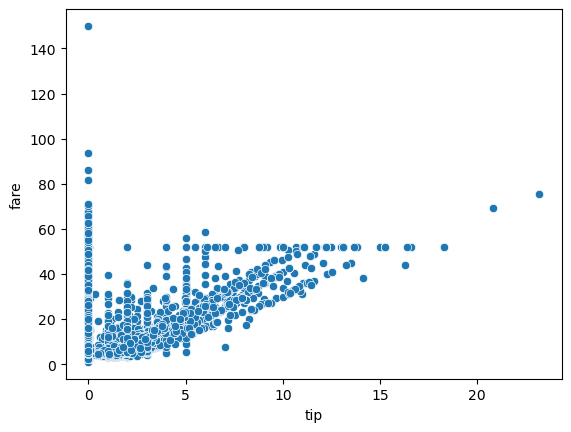

In [264]:
sns.scatterplot(data=df, x='tip', y='fare')

#### Spearman Correlation Test

**Hypotheses**:
- H0: Correlation is zero.
- H1: There is a significant correlation.ion

In [265]:
r, p_val = stats.spearmanr(df['tip'], df['fare'])
print(f'Correlation: {r}')
print(f'P-Value: {p_val}')

Correlation: 0.310254279563729
P-Value: 1.5556730728881364e-141


In [266]:
alpha = 0.05 # significance
if p_val < alpha:
    print('Reject Null Hypotheses. There is relationship.')
else:
    print('Fail to reject Null Hypotheses. There is no significant relationship.')

Reject Null Hypotheses. There is relationship.


### Relation between tolls and tip features

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tolls', ylabel='Count'>

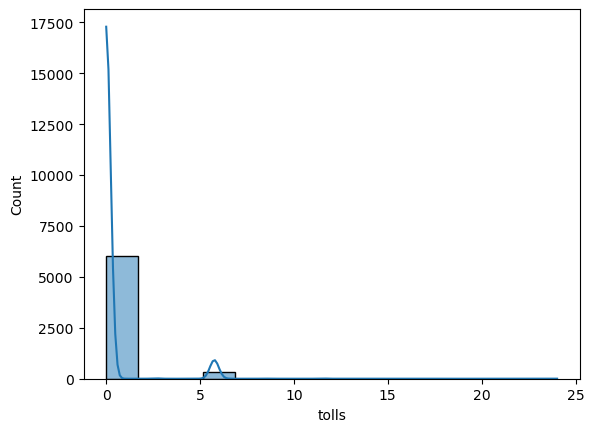

In [267]:
sns.histplot(data=df, x='tolls', kde=True)

<Axes: xlabel='tip', ylabel='tolls'>

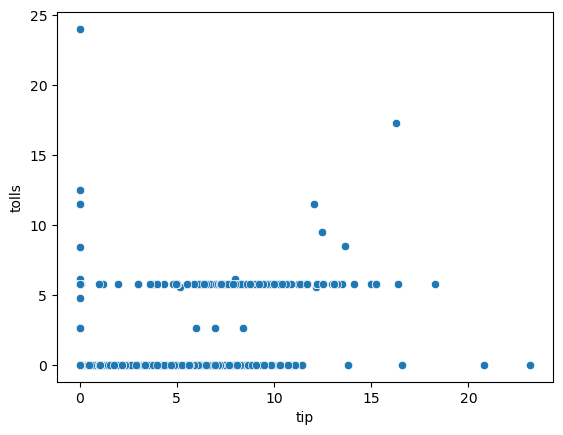

In [268]:
sns.scatterplot(data=df, x='tip', y='tolls')

#### Spearman Correlation Test

**Hypotheses**:
- H0: Correlation is zero.
- H1: There is a significant correlation.

In [269]:
r, p_val = stats.spearmanr(df['tip'], df['tolls'])
print(f'Correlation: {r}')
print(f'P-Value: {p_val}')

Correlation: 0.175380002891528
P-Value: 5.643276180955435e-45


In [270]:
alpha = 0.05 # significance
if p_val < alpha:
    print('Reject Null Hypotheses. There is relationship.')
else:
    print('Fail to reject Null Hypotheses. There is no significant relationship.')

Reject Null Hypotheses. There is relationship.


### Relation between distance and tip featues

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance', ylabel='Count'>

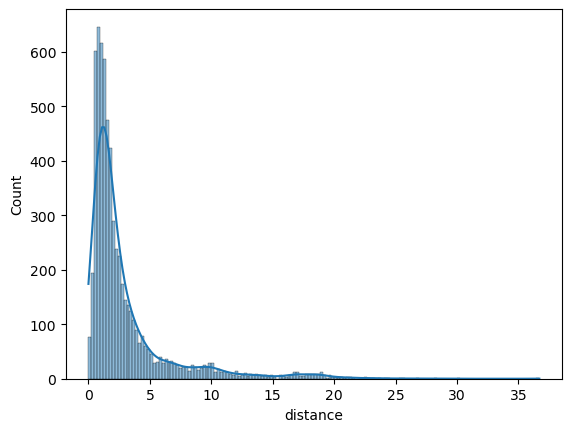

In [271]:
sns.histplot(data=df, x='distance', kde=True)

<Axes: xlabel='tip', ylabel='distance'>

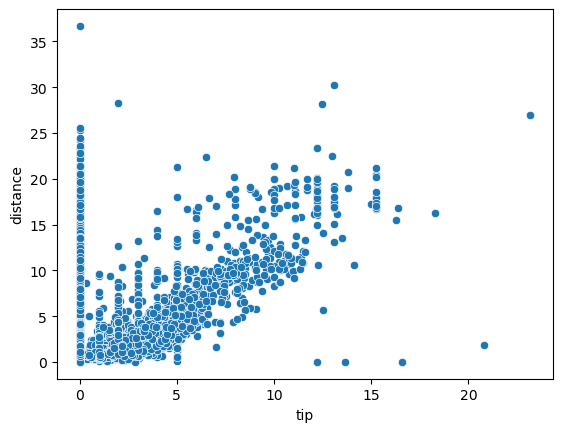

In [272]:
sns.scatterplot(data=df, x='tip', y='distance')

#### Spearman Correlation Test

**Hypotheses**:
- H0: Correlation is zero.
- H1: There is a significant correlation.

In [273]:
r, p_val = stats.spearmanr(df['tip'], df['distance'])
print(f'Correlation: {r}')
print(f'P-Value: {p_val}')

Correlation: 0.29265085410043695
P-Value: 1.9411181331374707e-125


In [274]:
alpha = 0.05 # significance
if p_val < alpha:
    print('Reject Null Hypotheses. There is relationship.')
else:
    print('Fail to reject Null Hypotheses. There is no significant relationship.')

Reject Null Hypotheses. There is relationship.


### Relation between total and tip features

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total', ylabel='Count'>

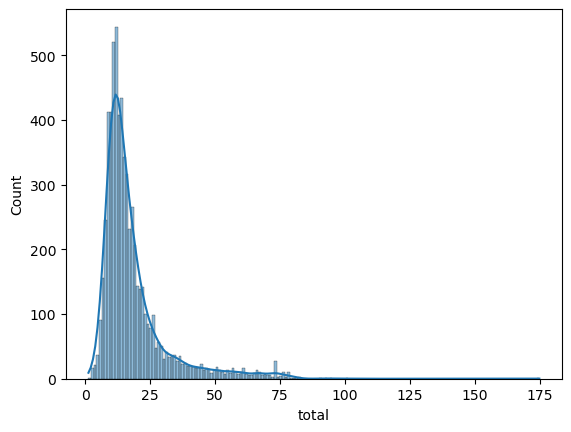

In [275]:
sns.histplot(data=df, x='total', kde=True)

<Axes: xlabel='tip', ylabel='total'>

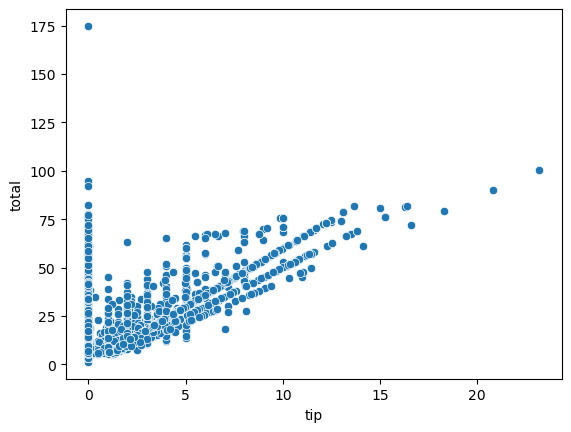

In [276]:
sns.scatterplot(data=df, x='tip', y='total')

#### Spearman Correlation Test

**Hypotheses**:
- H0: Correlation is zero.
- H1: There is a significant correlation.

In [277]:
r, p_val = stats.spearmanr(df['tip'], df['total'])
print(f'Correlation: {r}')
print(f'P-Value: {p_val}')

Correlation: 0.5028299699182296
P-Value: 0.0


In [278]:
alpha = 0.05 # significance
if p_val < alpha:
    print('Reject Null Hypotheses. There is relationship.')
else:
    print('Fail to reject Null Hypotheses. There is no significant relationship.')

Reject Null Hypotheses. There is relationship.


### Correlation Matrix between numerical columns

<Axes: >

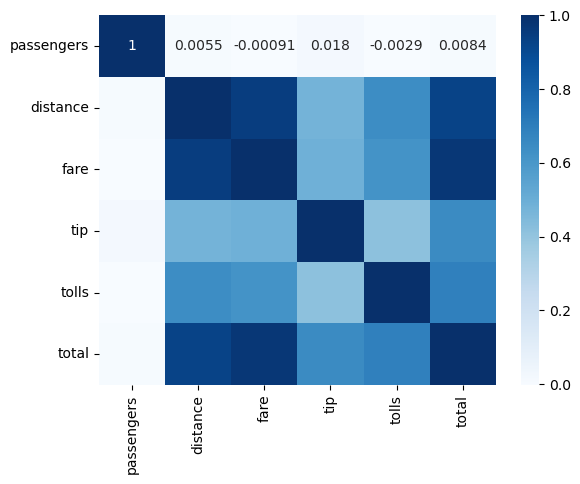

In [279]:
sns.heatmap(df[['passengers', 'distance', 'fare', 'tip', 'tolls',
       'total']].corr(), annot=True, cmap='Blues')

## Date features with target feature

In [280]:
# ANOVA test
# f1 oneway
def anova_test(feature, target):
  print(f'''
ANOVA test:
f1 oneway

Hypothesis:
H0: Distribution of {target} is the same across all {feature} categories.
H1: Distribution of {target} for at least one category differs.

  ''')
  categories = [group[target].values for name, group in df.groupby(feature)]
  
  f_stat, p_val = stats.f_oneway(*categories)
  print(f'ANOVA statistic: {f_stat}')
  print(f'P-Value: {p_val}\n')

  alpha = 0.05 # significance level
  if p_val < alpha:
      print('Reject Null Hypothesis. At least one group is different.')
  else:
      print('Fail to reject the Null Hypothesis. All groups have the same distribution.')

In [281]:
# independent t-test
def t_test(feature, group1, group2, target):
  print(f'''
Independent T-Test:

Hypothesis:
H0: Distribution of {group1} = Distribution of {group2}
H1: Distribution of {group1} != Distribution of  {group2}

  ''')
  group1 = df[df[feature]==group1][target]
  group2 = df[df[feature]==group2][target]

  t_stat, p_val = stats.ttest_ind(group1, group2)
  print(f'Indpendent T-Test Statictis: {t_stat}')
  print(f'P-value: {p_val}\n')


  alpha = 0.05
  if p_val < alpha:
      print(f'Reject Null Hypothesis: {group1} differ by  {group2}.')
  else:
      print(f'Fail to reject the Null Hypothesis: No significance difference between the groups.')

In [282]:
# Tukey HSD 
def tukey_hsd(feature, target):
  print('''
Tukey HSD test

H0: Distribution of group 1 = Distribution of group 2
H1: Distribution of group 1 != Distribution of group 2

  ''')
  groups = [group[target].values for name, group in df.groupby(feature)]
  tukey_result = pairwise_tukeyhsd(endog=df[target], groups=df[feature], alpha=0.05)
  print(tukey_result)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

In [284]:
len(df['pickup'].unique())

6322

In [285]:
df['pickup_month'] = df.pickup.dt.month_name()

In [286]:
df['pickup_year'] = df.pickup.dt.year

In [287]:
df['pickup_day'] = df.pickup.dt.day

In [288]:
df['pickup_dayname'] = df.pickup.dt.day_name()

In [289]:
df['pickup_hour'] = df.pickup.dt.hour

In [290]:
df['pickup_quarter'] = df.pickup.dt.quarter

In [291]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_year,pickup_day,pickup_dayname,pickup_hour,pickup_quarter
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,March,2019,23,Saturday,20,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,March,2019,4,Monday,16,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,March,2019,27,Wednesday,17,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,March,2019,10,Sunday,1,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,March,2019,30,Saturday,13,1


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
 14  pickup_month     6341 non-null   object      

In [293]:
len(df.dropoff.unique())

6333

In [294]:
df['dropoff_year'] = df.dropoff.dt.year

In [295]:
df['dropoff_month'] = df.dropoff.dt.month_name()

In [296]:
df['dropoff_day'] = df.dropoff.dt.day

In [297]:
df['dropoff_dayname'] = df.dropoff.dt.day_name()

In [298]:
df['dropoff_hour'] = df.dropoff.dt.hour

In [299]:
df['dropoff_quarter'] = df.dropoff.dt.quarter

In [300]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_year,pickup_day,pickup_dayname,pickup_hour,pickup_quarter,dropoff_year,dropoff_month,dropoff_day,dropoff_dayname,dropoff_hour,dropoff_quarter
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,March,2019,23,Saturday,20,1,2019,March,23,Saturday,20,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,March,2019,4,Monday,16,1,2019,March,4,Monday,16,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,March,2019,27,Wednesday,17,1,2019,March,27,Wednesday,18,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,March,2019,10,Sunday,1,1,2019,March,10,Sunday,1,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,March,2019,30,Saturday,13,1,2019,March,30,Saturday,13,1


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
 14  pickup_month     6341 non-null   object      

In [302]:
df.shape

(6341, 26)

### Categorical cols

### Relation between pickup_month and target

In [303]:
df.pickup_month.unique()

array(['March', 'February'], dtype=object)

In [304]:
df.pickup_month.value_counts()

pickup_month
March       6340
February       1
Name: count, dtype: int64

#### Graphical Analysis

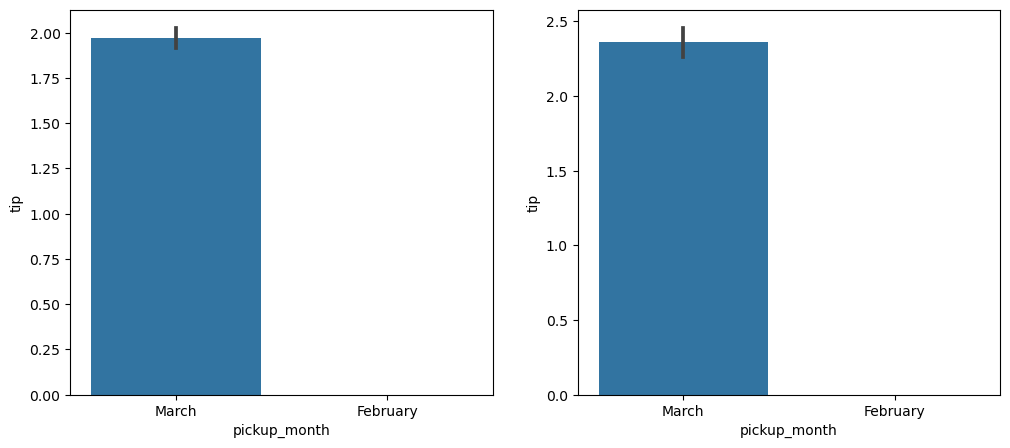

In [305]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='pickup_month', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='pickup_month', y='tip', estimator='std')
plt.show()

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


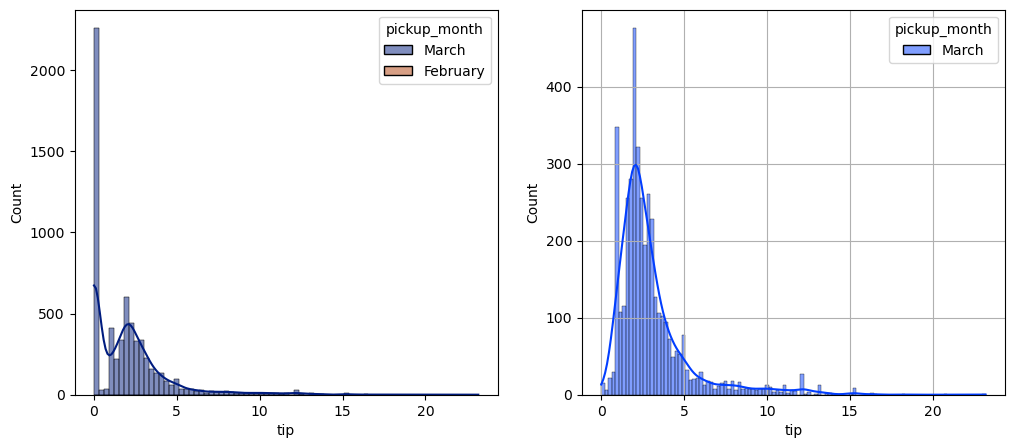

In [306]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tip', hue='pickup_month', kde=True, palette='dark')
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['tip'] > 0], x='tip', hue='pickup_month', kde=True, palette='bright')
plt.grid(True)
plt.show()

#### T-Test

In [307]:
t_test(feature='pickup_month', group1='March', group2='February', target='tip')


Independent T-Test:

Hypothesis:
H0: Distribution of March = Distribution of February
H1: Distribution of March != Distribution of  February

  
Indpendent T-Test Statictis: 0.8352658713084974
P-value: 0.4035995080184128

Fail to reject the Null Hypothesis: No significance difference between the groups.


**Insights**:
- pickup_month feature doesn't have significance.

**Decision**:
- pickup_month feature does not affect the target feature.

In [308]:
inaffective_features = []
inaffective_features.append('pickup_month')

### Relation between pickup_dayname and target

In [309]:
df.pickup_dayname.unique()

array(['Saturday', 'Monday', 'Wednesday', 'Sunday', 'Tuesday', 'Friday',
       'Thursday'], dtype=object)

In [310]:
df.pickup_dayname.value_counts()

pickup_dayname
Friday       1091
Saturday     1028
Wednesday     958
Thursday      896
Sunday        857
Tuesday       811
Monday        700
Name: count, dtype: int64

#### Graphical Analysis

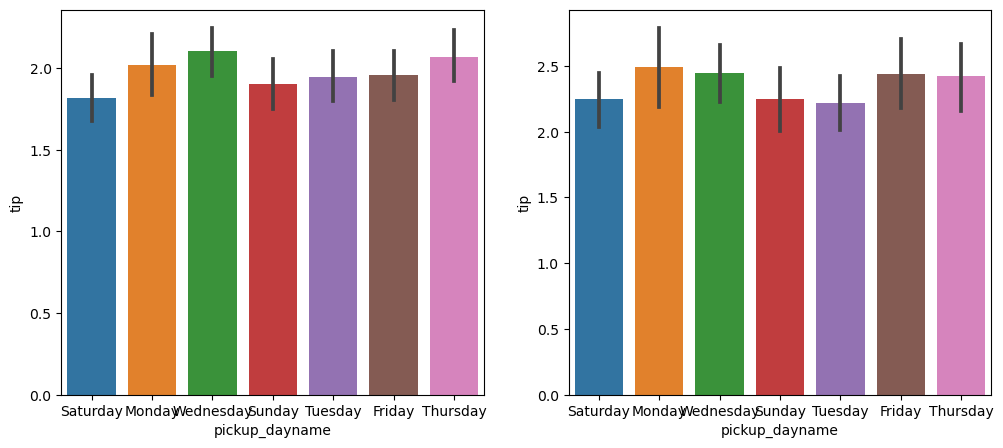

In [311]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='pickup_dayname', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='pickup_dayname', y='tip', estimator='std')
plt.show()

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


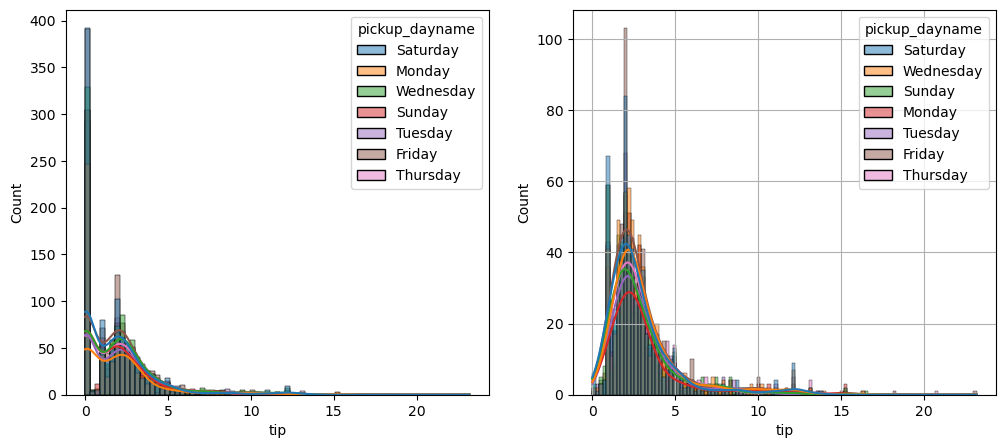

In [312]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tip', hue='pickup_dayname', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['tip'] > 0], x='tip', hue='pickup_dayname', kde=True)
plt.grid(True)
plt.show()

#### ANOVA test

In [313]:
anova_test(feature='pickup_dayname', target='tip')


ANOVA test:
f1 oneway

Hypothesis:
H0: Distribution of tip is the same across all pickup_dayname categories.
H1: Distribution of tip for at least one category differs.

  
ANOVA statistic: 1.6689152148182236
P-Value: 0.1242843162257308

Fail to reject the Null Hypothesis. All groups have the same distribution.


**Insights**:
- All the groups in pickup_dayname have the same distribution.

**Decision**:
- pickup_dayname feature doesn't affect the target feature

In [314]:
inaffective_features.append('pickup_dayname')

### Relation between dropoff_month and target

In [315]:
df.dropoff_month.unique()

array(['March', 'April', 'February'], dtype=object)

In [316]:
df.dropoff_month.value_counts()

dropoff_month
March       6339
April          1
February       1
Name: count, dtype: int64

#### Graphical Analysis

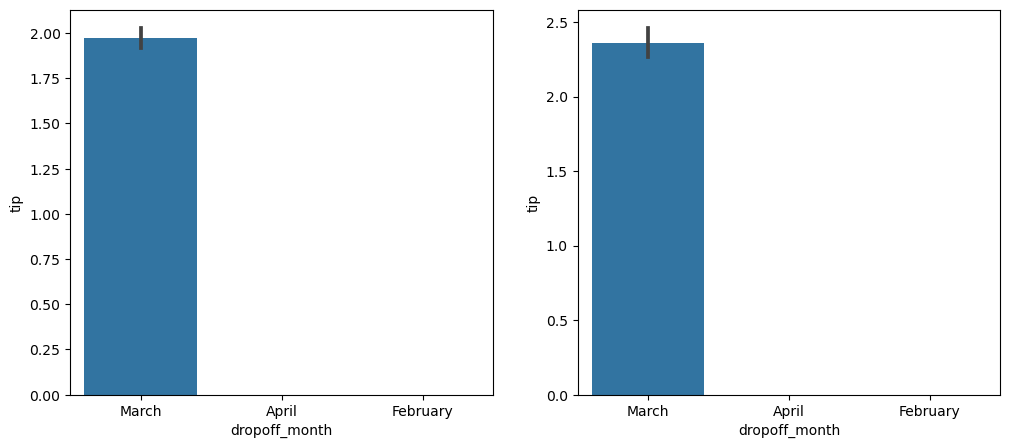

In [317]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='dropoff_month', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='dropoff_month', y='tip', estimator='std')
plt.show()

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


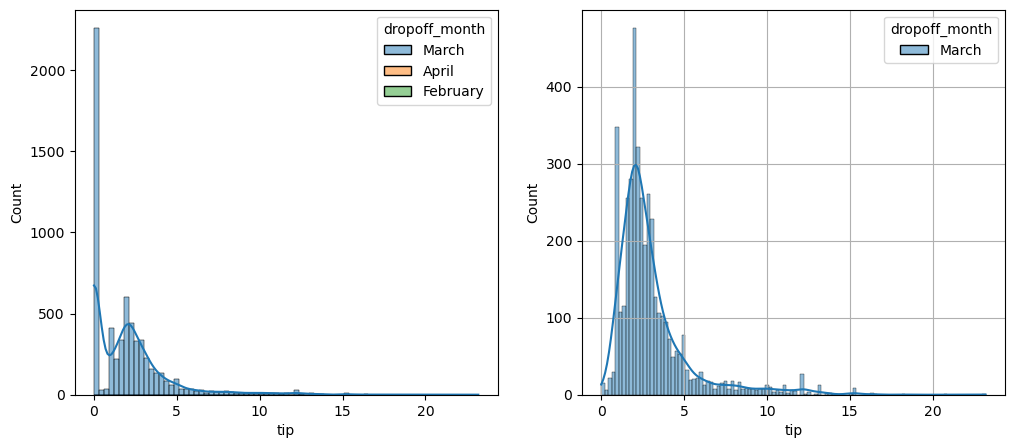

In [318]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tip', hue='dropoff_month', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['tip'] > 0], x='tip', hue='dropoff_month', kde=True)
plt.grid(True)
plt.show()

#### ANOVA test

In [319]:
anova_test(feature='dropoff_month', target='tip')


ANOVA test:
f1 oneway

Hypothesis:
H0: Distribution of tip is the same across all dropoff_month categories.
H1: Distribution of tip for at least one category differs.

  
ANOVA statistic: 0.6977458764114027
P-Value: 0.4977441577891454

Fail to reject the Null Hypothesis. All groups have the same distribution.


**Insights**:
- All the groups in pickup_dayname have the same distribution.

**Decision**:
- pickup_dayname feature doesn't affect the target feature

In [320]:
inaffective_features.append('dropoff_month')

### Relation between dropoff_dayname and target

In [321]:
df.dropoff_dayname.unique()

array(['Saturday', 'Monday', 'Wednesday', 'Sunday', 'Tuesday', 'Friday',
       'Thursday'], dtype=object)

In [322]:
df.dropoff_dayname.value_counts()

dropoff_dayname
Friday       1083
Saturday     1021
Wednesday     966
Thursday      896
Sunday        869
Tuesday       805
Monday        701
Name: count, dtype: int64

#### Graphical Analysis

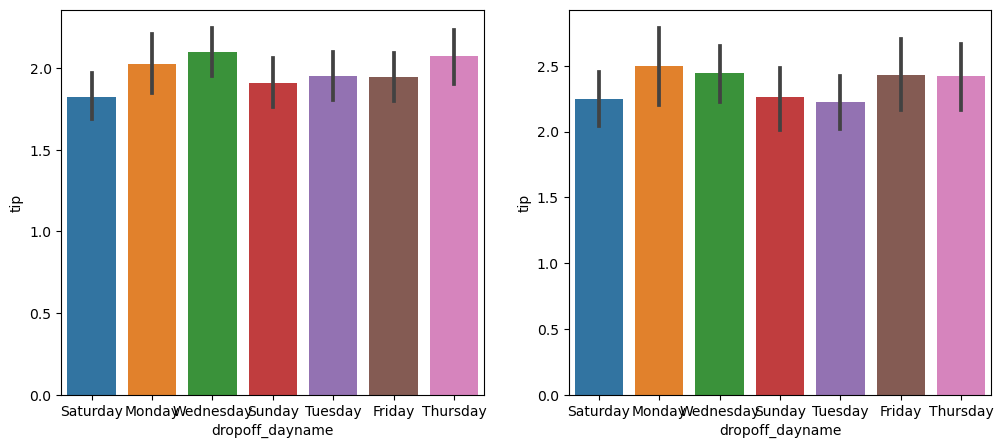

In [323]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='dropoff_dayname', y='tip', estimator='mean')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='dropoff_dayname', y='tip', estimator='std')
plt.show()

#### ANOVA test

In [324]:
anova_test(feature='dropoff_dayname', target='tip')


ANOVA test:
f1 oneway

Hypothesis:
H0: Distribution of tip is the same across all dropoff_dayname categories.
H1: Distribution of tip for at least one category differs.

  
ANOVA statistic: 1.6190096694735536
P-Value: 0.13742247930087778

Fail to reject the Null Hypothesis. All groups have the same distribution.


**Insights**:
- All the groups in pickup_dayname have the same distribution.

**Decision**:
- pickup_dayname feature doesn't affect the target feature

In [325]:
inaffective_features.append('dropoff_dayname')

### Numerical Cols

# Dropping unnecessary columns

In [326]:
df.drop(['pickup_month', 'pickup_dayname', 'dropoff_month', 'dropoff_dayname', 'pickup_year', 'dropoff_year'], inplace=True, axis=1)

In [340]:
df.drop(['pickup', 'dropoff'], inplace=True, axis=1)

# Encoding

In [341]:
lb = LabelEncoder()

In [342]:
cat = ['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']
for col in cat:
    df[col] = lb.fit_transform(df[col])

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6341 non-null   int64  
 1   distance         6341 non-null   float64
 2   fare             6341 non-null   float64
 3   tip              6341 non-null   float64
 4   tolls            6341 non-null   float64
 5   total            6341 non-null   float64
 6   color            6341 non-null   int64  
 7   payment          6341 non-null   int64  
 8   pickup_zone      6341 non-null   int64  
 9   dropoff_zone     6341 non-null   int64  
 10  pickup_borough   6341 non-null   int64  
 11  dropoff_borough  6341 non-null   int64  
 12  pickup_day       6341 non-null   int32  
 13  pickup_hour      6341 non-null   int32  
 14  pickup_quarter   6341 non-null   int32  
 15  dropoff_day      6341 non-null   int32  
 16  dropoff_hour     6341 non-null   int32  
 17  dropoff_quarter  63

In [344]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour,pickup_quarter,dropoff_day,dropoff_hour,dropoff_quarter
0,1,-0.375780,-0.549175,2.15,-0.229932,-0.413941,1,1,99,176,2,2,23,20,1,23,20,1
1,1,-0.593552,-0.735718,0.00,-0.229932,-0.695808,1,0,174,182,2,2,4,16,1,4,16,1
2,1,-0.437617,-0.502540,2.36,-0.229932,-0.320500,1,1,1,190,2,2,27,17,1,27,18,1
3,1,1.264233,1.316252,6.15,-0.229932,1.439435,1,1,86,202,2,2,10,1,1,10,1,1
4,3,-0.225221,-0.362633,1.10,-0.229932,-0.379190,1,1,116,202,2,2,30,13,1,30,13,1


# Feature Scaling

In [345]:
cont = ['distance','fare', 'tolls', 'total', 'total']

In [346]:
st = StandardScaler()
df[cont] = st.fit_transform(df[cont])

In [347]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour,pickup_quarter,dropoff_day,dropoff_hour,dropoff_quarter
0,1,-0.375780,-0.549175,2.15,-0.229932,-0.413941,1,1,99,176,2,2,23,20,1,23,20,1
1,1,-0.593552,-0.735718,0.00,-0.229932,-0.695808,1,0,174,182,2,2,4,16,1,4,16,1
2,1,-0.437617,-0.502540,2.36,-0.229932,-0.320500,1,1,1,190,2,2,27,17,1,27,18,1
3,1,1.264233,1.316252,6.15,-0.229932,1.439435,1,1,86,202,2,2,10,1,1,10,1,1
4,3,-0.225221,-0.362633,1.10,-0.229932,-0.379190,1,1,116,202,2,2,30,13,1,30,13,1


# Feature Selection

In [348]:
X = df.drop('tip', axis=1)
y = df.tip

In [349]:
X.shape

(6341, 17)

In [350]:
y.shape

(6341,)

# Train Test Split

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [352]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [353]:
model.coef_

array([-1.01657866e-02,  1.16958812e-01, -7.84363401e+00, -9.59080232e-01,
        9.67068056e+00, -1.19621108e+00,  5.56797063e-01, -8.32804317e-04,
       -1.54314452e-03,  2.17003187e-01, -7.95442656e-02,  1.17183360e+00,
        3.27568341e-02,  1.77635684e-15, -1.17132176e+00, -5.03226127e-02,
        0.00000000e+00])

In [354]:
model.intercept_

2.8357288858476295

# Training Score

In [355]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [356]:
model_train_score = model.score(X_train, y_train)
print(f'Model Training Score: {model_train_score}')

Model Training Score: 0.9241412459724447


In [357]:
model_test_score = model.score(X_test, y_test)
print(f'Model Testing Score: {model_test_score}')

Model Testing Score: 0.7170709594393128


In [358]:
root_mean_squared_error(y_train, y_train_pred)

0.6549001752831712

In [359]:
root_mean_squared_error(y_test, y_test_pred)

1.2214273078926805

In [360]:
mean_absolute_error(y_train, y_train_pred)

0.4385741273570401

In [361]:
mean_absolute_error(y_test, y_test_pred)

0.4485168471531195

In [362]:
mean_squared_error(y_train, y_train_pred)

0.4288942395859284

In [363]:
mean_squared_error(y_test, y_test_pred)

1.4918846684659608

In [364]:
r2_score(y_train, y_train_pred)

0.9241412459724447

In [365]:
r2_score(y_test, y_test_pred)

0.7170709594393128